In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import random

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# KOSIS의 소비자 동향 조사 결과 불러오기
df = pd.read_csv('201805-202105_CSI.csv',encoding='euc-kr')

In [3]:
# 분류코드: 성별과 연령 분류데이터 사용하지 않고 '전체'항목만 포함
# 지수코드: 항목별 소비자 지출 전망 조사 CSI만 포함
total_df = df[ df['지수코드별'].str.contains('의류비|외식비|여행비|교육비|보건비|문화생활비|교통비|주거비')  & df['분류코드별'].str.contains('전체')]

total_df = total_df.transpose() # transpose
total_df

,126,140,154,168,182,196,210,224
지수코드별,의류비 지출전망CSI,외식비 지출전망CSI,여행비 지출전망CSI,교육비 지출전망CSI,의료·보건비 지출전망CSI,교양·오락·문화생활비 지출전망CSI,교통비 및 통신비 지출전망CSI,주거비 지출전망CSI
분류코드별,전체,전체,전체,전체,전체,전체,전체,전체
2018. 05,101,95,98,106,112,92,109,103
2018. 06,101,94,97,105,110,90,110,103
2018. 07,100,92,96,105,112,89,108,103
2018. 08,98,92,92,106,111,89,109,103
2018. 09,100,93,91,101,113,94,108,108
2018. 10,100,93,92,101,115,92,109,108
2018. 11,97,92,89,101,114,90,108,106
2018. 12,96,90,88,103,113,91,108,105


In [4]:
# 데이터 프레임 formatting
header = total_df.iloc[0] # 각 CSI항목이 데이터프레임 헤더가 될 수 있게 저장
total_df = total_df[1:] # 현재 데이터 프레임의 첫 줄 (헤더) 제거
total_df.columns = header # 저장해 두었던 새 헤더로 데이터 프레임 헤더 설정
total_df = total_df[1:] # 모든 값이 '전체' 인 '분류코드별' 행 삭제
total_df

지수코드별,의류비 지출전망CSI,외식비 지출전망CSI,여행비 지출전망CSI,교육비 지출전망CSI,의료·보건비 지출전망CSI,교양·오락·문화생활비 지출전망CSI,교통비 및 통신비 지출전망CSI,주거비 지출전망CSI
2018. 05,101,95,98,106,112,92,109,103
2018. 06,101,94,97,105,110,90,110,103
2018. 07,100,92,96,105,112,89,108,103
2018. 08,98,92,92,106,111,89,109,103
2018. 09,100,93,91,101,113,94,108,108
2018. 10,100,93,92,101,115,92,109,108
2018. 11,97,92,89,101,114,90,108,106
2018. 12,96,90,88,103,113,91,108,105
2019. 01,96,90,89,105,114,91,108,105
2019. 02,96,89,89,104,112,91,110,103


<function matplotlib.pyplot.show(*args, **kw)>

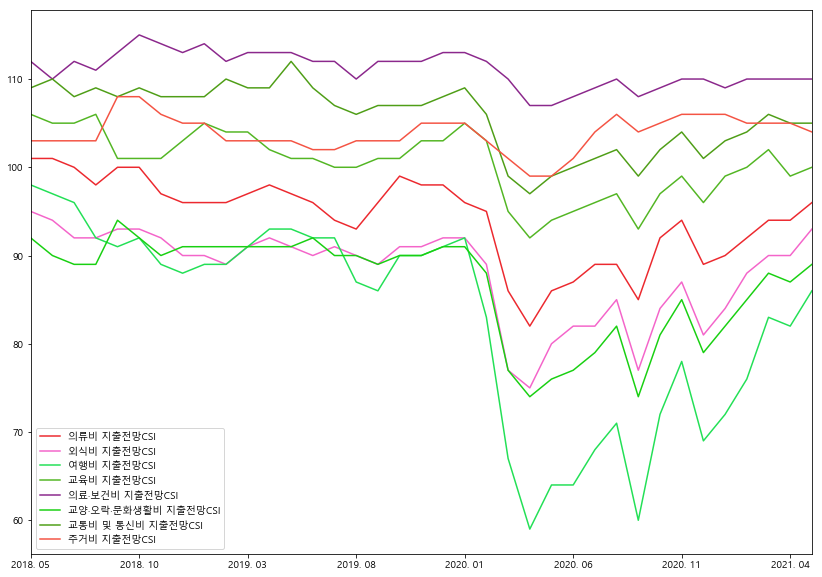

In [5]:
# 항목별 CSI 변화 시각화
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.figure(figsize=(14, 10))

# 데이터 프레임에 있는 모든 열(항목)을 한 그래프에 색이 다른 각 line으로 시각화
for col in total_df:
    # 라인 그래프 색은 랜덤 RGB 채널 지정
    new_rgb = (random.random(), random.random(), random.random())
    total_df[col].plot(kind='line', color = new_rgb)

plt.legend()
plt.show

In [6]:
# 코로나 전후 (2020년 1월 기준) 표준편차 비교하기
before_covid = total_df[:'2020. 01']
after_covid = total_df['2020. 01':]

before_std_dict = {}
after_std_dict = {}

# 각 항목별 표준편차 구해서 dict에 (key == 항목이름, value == CSI 표준편차 로) 저장
for col in before_covid:
    stdv = before_covid[col].std()
    before_std_dict[col] = stdv
    
for col in after_covid:
    stdv = after_covid[col].std()
    after_std_dict[col] = stdv

# 결과 보기
print(before_std_dict)
print(after_std_dict)

{'의류비 지출전망CSI': 2.1591444513753038, '외식비 지출전망CSI': 1.5352989471574767, '여행비 지출전망CSI': 3.038640046687553, '교육비 지출전망CSI': 2.0224925687072846, '의료·보건비 지출전망CSI': 1.2071217242444345, '교양·오락·문화생활비 지출전망CSI': 1.1892374507581378, '교통비 및 통신비 지출전망CSI': 1.325572652532805, '주거비 지출전망CSI': 1.7320508075688772}
{'의류비 지출전망CSI': 4.212202162625095, '외식비 지출전망CSI': 5.45570397678915, '여행비 지출전망CSI': 9.531295202400045, '교육비 지출전망CSI': 3.5799687806722886, '의료·보건비 지출전망CSI': 1.5458673560021057, '교양·오락·문화생활비 지출전망CSI': 5.465802777268862, '교통비 및 통신비 지출전망CSI': 3.1842904833499315, '주거비 지출전망CSI': 2.3592745644770208}


In [7]:
# 표준편차의 차이 (코로나 이후 - 코로나 전) 구해서 dict에 같은 형식으로 저장하기
dif_std = {}
for csi, std in before_std_dict.items():
    dif_std[csi] = after_std_dict[csi] - before_std_dict[csi]
# 오름차순으로 표준편차 정렬해서 결과 프린트
{csi: std for csi, std in sorted(dif_std.items(), key=lambda item: item[1])}

{'의료·보건비 지출전망CSI': 0.33874563175767114,
 '주거비 지출전망CSI': 0.6272237569081436,
 '교육비 지출전망CSI': 1.557476211965004,
 '교통비 및 통신비 지출전망CSI': 1.8587178308171264,
 '의류비 지출전망CSI': 2.0530577112497914,
 '외식비 지출전망CSI': 3.920405029631673,
 '교양·오락·문화생활비 지출전망CSI': 4.276565326510724,
 '여행비 지출전망CSI': 6.492655155712493}

### 분산분석 (ANOVA) 

In [8]:
import scipy as sp
from scipy import stats # statistics

# ANOVA

# H0: no difference among group means 각 카테고리의 그룹 평균값 사이에는 차이가 없다 
# HA: at least one group differs significantly from the overall mean of the dependent variable 각 카테고리의 그룹 평균값 중 적어도 하나의 카테고리는 다른 그룹 평균값과 차이가 있다 

medical = total_df['의료·보건비 지출전망CSI'].values.astype(int)
residential = total_df['주거비 지출전망CSI'].values.astype(int)
education = total_df['교육비 지출전망CSI'].values.astype(int)
transportation = total_df['교통비 및 통신비 지출전망CSI'].values.astype(int)
apparel = total_df['의류비 지출전망CSI'].values.astype(int)
dining = total_df['외식비 지출전망CSI'].values.astype(int)
leisure = total_df['교양·오락·문화생활비 지출전망CSI'].values.astype(int)
traveling = total_df['여행비 지출전망CSI'].values.astype(int)

stats.f_oneway(medical, residential, education, transportation, apparel, dining, leisure, traveling) # p-value < 0.05 => reject H0 => 그룹평균값 사이에는 차이가 있다

F_onewayResult(statistic=122.06536422749213, pvalue=2.501112132698264e-82)

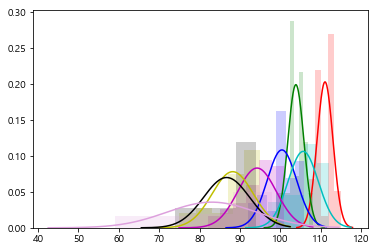

In [9]:
sns.distplot(medical, kde=False, fit=sp.stats.norm, hist_kws={'color': 'r', 'alpha': 0.2}, fit_kws={'color': 'r'},label='의료')
sns.distplot(residential, kde=False, fit=sp.stats.norm, hist_kws={'color': 'g', 'alpha': 0.2}, fit_kws={'color': 'g'},label='주거')
sns.distplot(education, kde=False, fit=sp.stats.norm, hist_kws={'color': 'b', 'alpha': 0.2}, fit_kws={'color': 'b'},label='교육')
sns.distplot(transportation, kde=False, fit=sp.stats.norm, hist_kws={'color': 'c', 'alpha': 0.2}, fit_kws={'color': 'c'},label='교통')
sns.distplot(apparel, kde=False, fit=sp.stats.norm, hist_kws={'color': 'm', 'alpha': 0.2}, fit_kws={'color': 'm'},label='의류')
sns.distplot(dining, kde=False, fit=sp.stats.norm, hist_kws={'color': 'y', 'alpha': 0.2}, fit_kws={'color': 'y'},label='외식')
sns.distplot(leisure, kde=False, fit=sp.stats.norm, hist_kws={'color': 'k', 'alpha': 0.2}, fit_kws={'color': 'k'},label='여가')
sns.distplot(traveling, kde=False, fit=sp.stats.norm, hist_kws={'color': 'plum', 'alpha': 0.2}, fit_kws={'color': 'plum'},label='여행')

## Web scrapping -with post request
### 업종별 카드 사용 통계량

In [10]:
import requests
from bs4 import BeautifulSoup

In [11]:
# 네이버 데이터랩에서 업종별 카드사용통계 가져오기
header = {
'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.106 Safari/537.36'
}

# 지역: 서울특별시, 업종: 생활-건강-전체, 성별: 전체, 연령: 전체
url = "https://datalab.naver.com/local/card/api.naver"
data = {'type': 'a', 
        'c1': '1100000000',
        'c2': 'living-health-etc,living-health-facil,living-health-hospital,living-health-manufac,living-health-medifacil,living-health-pharmacy',
        'c3': 'A',
        'c4': '0'}

In [12]:
import json

# 크롤링 결과 json 파일형식으로 저장
result_dict = requests.post(url, data=data, headers=header).json()

In [13]:
# 불필요한 정보 제거하고 결과값 (result)만 저장
result_dicts_list = result_dict['result']

In [14]:
# 원하는 데이터 포인트 (각 달과 카드사용량) 가져오기
each_dict = result_dicts_list[0]
each_dict['data']
# note: 네이버 데이터 랩에서는 데이터 포인트가 13달 이였는데 2021 2월과 3월 데이터 (그래프 상 value == 0) 행이 존재하지 않음

[{'period': '20200401', 'value': 85.0},
 {'period': '20200501', 'value': 91.0},
 {'period': '20200601', 'value': 85.0},
 {'period': '20200701', 'value': 93.0},
 {'period': '20200801', 'value': 87.0},
 {'period': '20200901', 'value': 93.0},
 {'period': '20201001', 'value': 85.0},
 {'period': '20201101', 'value': 85.0},
 {'period': '20201201', 'value': 94.0},
 {'period': '20210101', 'value': 97.0},
 {'period': '20210401', 'value': 100.0}]

In [15]:
# 데이터에서 달 extract
each_dict['data'][0]['period'][4:6]

'04'

In [16]:
# missing data가 없을 때 결과값 (list of dictionaries)를 데이터프레임화
def result_to_df():
    df = pd.DataFrame()
    rowidx = []
    colnames = []

    for i in range(len(result_dicts_list)):
        each_dict = result_dicts_list[i]

        colname = each_dict['title']
        colnames.append(colname)

        data = each_dict['data']
        for j in range(13):
            # 모든데이터 (13달) 존재시, 각 달 ('period') 별로 데이터 저장
            rowname = data[j]['period']
            rowidx.append(rowname)
            df.at[rowname, colname] = data[j]['value']
    return df

In [17]:
# 'yyyymmdd'형식의 문자열이 주어졌을때 다음달 문자열 돌려주기
def next_period(current_period):
    
    # 문자열에서 y, m, d 찾기
    year = current_period[:4]
    month = current_period[4:6]
    day = current_period[6:]
    
    # 12월일 경우 다음달 ==. 월, 다음해로 넘어가기
    if (month == '12'):
        month = '01'
        year = str(int(year) + 1)

    # 다른 달은 1씩 추가하기
    else:
        month = str(int(month) + 1)
        # mm 형태를 맞추기 위해 한자리수인 달은 앞에 0추가해서 문자열로 저장
        if len(month) != 2:
            month = '0' + month
    
    # 결과값 다시 yyyymmdd형식으로 합치기
    next_period = year + month + day

    return next_period

In [18]:
# 데이터 13달 중 첫번째가 아닌 그 이후의 달 (period)행이 missing data일 때 
#    list of dictionaries를 dataframe으로 missing period의 값을 0으로 주면서 변환
def result_wo_all_13months_to_df():
    df = pd.DataFrame()

    # 각 항목별로 each_dict에 저장 후 데이터프레임에 저장하기
    for i in range(len(result_dicts_list)):
        each_dict = result_dicts_list[i]

        # 각 열의 이름을 CSI 항목 이름으로 저장
        colname = each_dict['title']

        data = each_dict['data']
        
        # 첫 달 데이터 데이터 프레임에 저장
        rowname = data[0]['period']
        df.at[rowname, colname] = data[0]['value']
        last_date = rowname
        
        # loop으로 새로운 달 데이터가 직전에 처리된 데이터의 다음 달이 맞는지 확인 후 데이터 프레임 저장
        j = 1
        while j < len(data):
            rowname = data[j]['period']
            next_date = next_period(last_date)
            
            # 직전에 처리된 달의 다음달 == 새로운 달이면 데이터 프레임에 추가
            if (next_date == rowname):
                df.at[rowname, colname] = data[j]['value']
                j += 1
                # 직전 처리된 달 변수 업데이트
                last_date = rowname
            
            # 직전에 처리된 달의 다음 달이 새로운 달이 아니라면 원래 있어야할 새로운 달 데이터 (값 0)을 ㅗ추가
            else:
                missing_rowname = next_date
                df.at[missing_rowname, colname] = '0'
                last_date = missing_rowname
            
    return df

In [19]:
# 'yyyymmdd'의 형식의 문자열이 주어졌을때 지난 달을 문자열로 돌려주는 함수
def last_period (current_period):

    year = current_period[:4]
    month = current_period[4:6]
    day = current_period[6:]
    
    # 1월의 경우 지난달 == 12월 이고 연도 = (현재 연도 - 1)
    if (month == '01'):
        month = '12'
        year = str(int(year) - 1)

    # 아닌 경우 한 달 빼기
    else:
        month = str(int(month) - 1)
        # mm 형태 확인하기
        if len(month) != 2:
            month = '0' + month
        
    next_period = year + month + day
    
    return last_period

In [20]:
# 데이터 13달 중 처음 두 달 (period)행이 missing data일 때 
#    list of dictionaries를 dataframe으로 missing period의 값을 0으로 주면서 변환
def first_date_missing_to_df():
    
    df = pd.DataFrame()
    
    # 첫 input 데이터로 처음 두 missing rows의 period를 찾기
    first_given_pd = result_dicts_list[0]['data'][0]['period']
    second_pd = last_period(first_given_pd)
    first_pd = last_period(first_pd)

    # 나머지 period들 dataframe에 넣기
    for i in range(len(result_dicts_list)):
        each_dict = result_dicts_list[i]

        colname = each_dict['title']
        data = each_dict['data']
        
        df.at[first_pd, colname] = '0'
        df.at[second_pd, colname] = '0'
        last_date = second_pd
        
        j = 0
        while j < len(data):
            rowname = data[j]['period']
            
            next_date = next_period(last_date)
            
            if (next_date == rowname):
                df.at[rowname, colname] = data[j]['value']
                j += 1
                last_date = rowname
            
            # 만약 남은 데이터의 날짜형식이 매치되지 않는다면 2개의 달보다 더 많은 데이터가 missing
            else:
                print("More than 2 rows (at the beginning) are missing in this data")
    return df

In [21]:
# 웹 크롤링 결과 데이터프레임화 하기

# 13달치 데이터가 모두 존재할 때 데이터프레임화
try:
    card_usage_df = result_to_df()

# 만약 13달이 아니라 2021년 2월 3월처럼 missing data가 있다면
except:
    
    # 첫 데이터가 missing 이 아니라면 (데이터가 2021.02나 03으로 시작하지 않는다면)
    try:
        card_usage_df = result_wo_all_13months_to_df()
    # 첫 데이터가 missing 이라면
    except:
        card_usage_df = first_date_missing_to_df()
        
    

card_usage_df

,의료시설,병원,건강 기타,약국,건강시설,의료용품제조
20200401,85,76.0,82.0,76.0,58.0,46.0
20200501,91,79.0,89.0,75.0,65.0,43.0
20200601,85,82.0,72.0,73.0,60.0,38.0
20200701,93,88.0,78.0,69.0,59.0,47.0
20200801,87,78.0,72.0,60.0,61.0,38.0
20200901,93,76.0,84.0,65.0,56.0,44.0
20201001,85,76.0,76.0,59.0,55.0,39.0
20201101,85,78.0,63.0,58.0,52.0,34.0
20201201,94,82.0,80.0,63.0,45.0,40.0
20210101,97,86.0,70.0,59.0,53.0,36.0


## Web scrapping -with post request
### 업종별 카드 사용 통계량

In [22]:
# 가장 높은 값 (100)을 가지는 구는 어떤 구?

header = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.106 Safari/537.36'}

# 가장 큰 값이 들어있는 구 이름을 찾아주는 함수
def get_guName_withMaxValue():
    import json
    # 전체 구를 선택
    data_forAll = {
        'type': 'j',
        'c1': 'living-health-hospital',
        'c2': '1111000000,1114000000,1117000000,1120000000,1121500000,1123000000,1126000000,1129000000,1130500000,1132000000,1135000000,1138000000,1141000000,1144000000,1147000000,1150000000,1153000000,1154500000,1156000000,1159000000,1162000000,1165000000,1168000000,1171000000,1174000000',
        'c3': 'A',
        'c4': '0'
    }
    result_dict_forAll = requests.post(url,headers=header,data=data_forAll).json()
    # 전체구를 선택해서 받아온 데이터에, 자동으로 가장 큰 값을 포함한 구가 고정된 위치(result key 안 0번째 index)에 들어가 있음
    guNameWithMaxValue = result_dict_forAll['result'][0]['title']
    print('최고값이 들어있는 구 : {}'.format(guNameWithMaxValue))
    return guNameWithMaxValue

# 구의 indexCode를 찾아주는 함수
# 왜 필요? 최고값을 포함한 구 데이터를 post 요청하기 위해선 해당 구의 indexCode를 헤더와 같이 넘겨주어야함. (아래 사진 참고)
def get_guCode(guName):
    # 아래 url에 구 이름 & 구의 indexCode가 담겨있음. 
    gu_codes_url= 'https://datalab.naver.com/local/land/listExceptRestrict.naver'
    gu_codes = requests.post(gu_codes_url,
                        headers=header,
                        data={'code': '1100000000'}
                       ).json()
    
    cleared_gu_indices = {} # 구이름을 넣었을 때, 구 코드가 나오도록, 구이름을 key, 구 코드를 value로 하는 빈 딕셔너리 생성
    for gu in gu_codes['data']:
        gu_name = gu['name']
        gu_code = gu['code']
        cleared_gu_indices[gu_name] = gu_code
    
    print("{}의 indexCode: {}".format(guName,cleared_gu_indices[guName]))
    return cleared_gu_indices[guName]

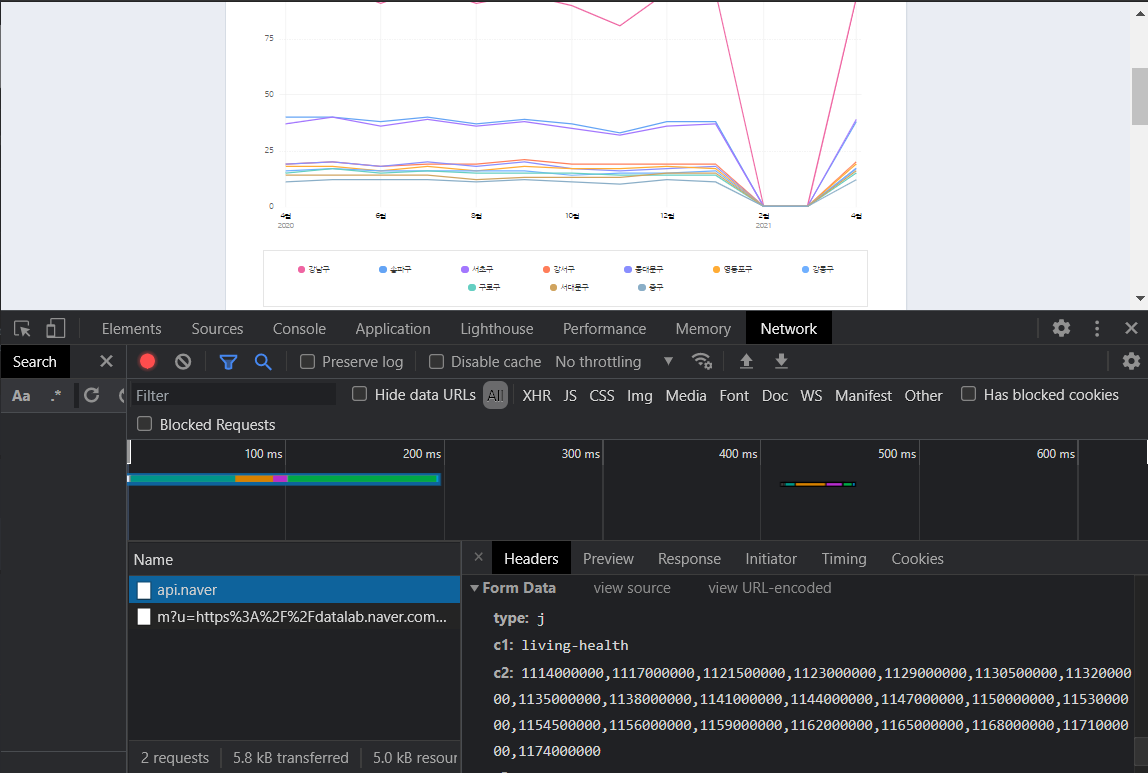
- 각 구별로 서로다른 indexCode를 가지고 있음. <br>
- post 요청을 보낼 때, 구 이름이 아닌 구의 indexCode를 header와 같이 보내주어야함. <br>
- 각 구별 매칭되는 indexCode를 포함한 dict이 필요함 <br>

In [23]:
guWithMax = get_guName_withMaxValue() # 최대값이 포함된 구 이름을 찾아 guWithMax에 넣어준다
guCode = get_guCode(guWithMax) # 그 구 이름에 해당하는 구 코드를 guCode에 담아준다

최고값이 들어있는 구 : 강남구
강남구의 indexCode: 1168000000


In [24]:
import requests
from bs4 import BeautifulSoup

url = 'https://datalab.naver.com/local/card/api.naver'

header = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.106 Safari/537.36'}


# format메소드로 위에서 얻어낸 최고값이 들어있는 구의 indexCode(guCode) 넣어주기
# 해당 url에서 '전체 구' 선택 -> 지출값이 큰 상위 10개의 구만 보여준다 -> 전체 25개 구의 데이터를 얻기 위해 8/8/9개씩 총 3번에 나누어 가져오면 모든 구 지출값을 가져올 수 있음
# 선택된 구에서 제일 큰 지출값을 100으로 리턴해준다는 특성을 이용하여, 데이터를 나누어 가져올 시 항상 가장 큰 값이 포함된 구를 포함되게 불러와준다면 제일 큰 지출값을 100으로 기준으로 한 나머지 지출값의 상대적인 크기를 비교할 수 있음
data1 = {
  'type': 'j',
    'c1': 'living-health-hospital',
    'c2': '{},1111000000,1114000000,1117000000,1120000000,1121500000,1123000000,1126000000,1129000000'.format(guCode),
    'c3': 'A',
    'c4': '0'
}

data2 = {
  'type': 'j',
    'c1': 'living-health-hospital',
    'c2': '{},1130500000,1132000000,1135000000,1138000000,1141000000,1144000000,1147000000,1150000000'.format(guCode),
    'c3': 'A',
    'c4': '0'
}

data3 = {
    'type': 'j',
    'c1': 'living-health-hospital',
    'c2': '{},1153000000,1154500000,1156000000,1159000000,1162000000,1165000000,1168000000,1171000000,1174000000'.format(guCode),
    'c3': 'A',
    'c4': '0'
}

import json
# 3번에 나누어 보낸 post request 결과값
result_dict1 = requests.post(url,headers=header,data=data1).json()
result_dict2 = requests.post(url,headers=header,data=data2).json()
result_dict3 = requests.post(url,headers=header,data=data3).json()

In [25]:
# result_dict1 
# result_dict2
# result_dict3
result_dicts = [result_dict1,result_dict2,result_dict3] 

In [26]:
cleared_result_dict = {}
# post 요청을 통해 얻은 데이터 중 필요한 값(구 이름, 해당 지출값)만 추출
for result_dict in result_dicts:
    for each_dict in result_dict['result']:
        each_dict_title = each_dict['title'] # 구이름
        each_dict_data = each_dict['data'] # 해당 지출값
        cleared_result_dict[each_dict_title]=each_dict_data

In [27]:
# 각 카테고리(==구)별 Dataframe들을 생성 후 -> date column을 기준으로 outer join -> 최종 dataframe 생성 
# outer join을 통해 생성된 Dataframe은 dataframe A와 dataframe B가 서로 공유하던/공유하지 않던, 모든 데이터를 빠짐없이 merge함. 
# 왜 사용? 각 구가 가진 period 데이터가 일치하다는 보장이 없음. 최종 dataframe에는 모든 date 데이터를 빠짐없이 포함해주고 싶어서 outer join 사용

categories = list(cleared_result_dict.keys()) # 25개 자치구이름을 리스트로 

merged_df = pd.DataFrame() # 빈 데이터프레임 생성. 나중에 각 구의 df를 merge해줄 것임

for category in categories:
    data_column = [] # 각 구의 df를 생성하기 위한 데이터 컬럼
    for valueByDate in cleared_result_dict[category]:
        data_column.append(valueByDate['value'])
    
    date_indices = [] # 각 구의 df를 생성하기 위한 인덱스 컬럼
    for period in cleared_result_dict[category]:
        date_indices.append(period['period'])
    
    ## outer join 
    new_df = pd.DataFrame({category:data_column,'date':date_indices}) # 각 구별 df 생성
    if merged_df.empty: # 처음 루프를 돌 때, merged_df가 비어있다면,
        merged_df = new_df # 바로 new_df를 넣어주고 
    else: # 비어있지 않다면,
        merged_df=pd.merge(merged_df,new_df,on='date',how='outer') #outer join으로 merge시켜주어, 모든 카테고리 데이터를 공집합으로 포함시킴 + 중복되는 열들은 자동으로 하나만 리턴시킴

merged_df.set_index('date',inplace=True)  

merged_df

,강남구,종로구,동대문구,성북구,광진구,성동구,중구,중랑구,용산구,서대문구,...,마포구,강북구,송파구,서초구,영등포구,구로구,강동구,동작구,관악구,금천구
date,,,,,,,,,,,,,,,,,,,,,
20200401,82.0,45.0,26.0,15.0,14.0,10.0,6.0,6.0,6.0,49.0,...,2.0,2.0,58.0,39.0,26.0,21.0,20.0,15.0,7.0,5.0
20200501,81.0,48.0,26.0,15.0,13.0,10.0,8.0,6.0,6.0,46.0,...,2.0,2.0,62.0,41.0,27.0,23.0,21.0,15.0,7.0,5.0
20200601,86.0,52.0,27.0,15.0,14.0,10.0,8.0,6.0,6.0,50.0,...,3.0,2.0,66.0,40.0,28.0,21.0,21.0,15.0,7.0,5.0
20200701,96.0,56.0,28.0,17.0,15.0,11.0,10.0,7.0,7.0,51.0,...,3.0,3.0,68.0,44.0,29.0,24.0,22.0,17.0,7.0,6.0
20200801,85.0,47.0,25.0,14.0,13.0,9.0,10.0,6.0,6.0,43.0,...,3.0,2.0,60.0,41.0,27.0,20.0,19.0,14.0,7.0,6.0
20200901,83.0,43.0,25.0,13.0,12.0,9.0,9.0,7.0,6.0,42.0,...,3.0,3.0,57.0,40.0,25.0,20.0,20.0,13.0,8.0,5.0
20201001,84.0,45.0,25.0,14.0,13.0,10.0,9.0,6.0,6.0,44.0,...,3.0,2.0,59.0,41.0,27.0,21.0,19.0,14.0,7.0,5.0
20201101,82.0,50.0,25.0,14.0,13.0,10.0,9.0,6.0,6.0,46.0,...,2.0,2.0,59.0,40.0,27.0,21.0,20.0,14.0,7.0,5.0
20201201,93.0,50.0,27.0,15.0,13.0,10.0,9.0,8.0,6.0,49.0,...,3.0,2.0,63.0,42.0,27.0,21.0,21.0,16.0,7.0,5.0


In [34]:
import folium

# location: Seoul, KR
# get the map of seoul (interactive)
seoul = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner') 

# load the json file w/ list of municipalities of Seoul
geo_path = 'skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, "r", encoding='utf-8'))

# get the last row (most recent data) of the dataframe with card usage by municipalities
#    and transpose it to match the format for choropleth
most_recent = merged_df.tail(1).T
# rename the column
most_recent.columns = ['최근 소비 통계']
most_recent.index.name = '구별'

most_recent

,최근 소비 통계
구별,
강남구,100.0
종로구,56.0
동대문구,29.0
성북구,15.0
광진구,14.0
성동구,11.0
중구,9.0
중랑구,8.0
용산구,7.0


In [58]:
temp = most_recent.sort_values(by='최근 소비 통계', ascending=False)
temp

      최근 소비 통계
구별            
강남구      100.0
송파구       69.0
종로구       56.0
서대문구      53.0
서초구       47.0
동대문구      29.0
영등포구      29.0
구로구       25.0
강서구       24.0
강동구       23.0
동작구       17.0
노원구       16.0
양천구       15.0
성북구       15.0
은평구       14.0
광진구       14.0
성동구       11.0
중구         9.0
중랑구        8.0
관악구        8.0
용산구        7.0
도봉구        6.0
금천구        6.0
마포구        3.0
강북구        3.0


In [29]:
# visualization
seoul.choropleth(geo_data = geo_str,
               data = most_recent['최근 소비 통계'],
               columns = [most_recent.index, most_recent['최근 소비 통계']], 
               fill_color = 'PuRd',
               key_on = 'feature.id')

C:\Users\USER\Anaconda3\lib\site-packages\folium\folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [30]:
# !pip install folium --upgrade
#: cannot find tooltip error가 나오는 경우 
# 왜? 현버전이 tooltip 파라미터를 지원하지 않아서
# 해결책? folium 라이브러리 업데이트 후 재부팅

#### Seoul map 내 각 자치구에 mouse hover시 자치구 이름 & 지출값이 나오도록하는 Marker를 그려보자

In [31]:
from folium import plugins

In [32]:
geo_center = json.load(open('서울시 행정구역 시군구 정보 (좌표계_ WGS1984).json',encoding='utf-8')) # Marker를 꽂을 coordinates(longitude,latitude)를 포함하는 데이터. 각 자치구의 중앙 위/경도를 나타냄.

cleared_geo_center = []   
# 우리가 필요한 데이터만 cleared_geo_center에 담는 과정                 
for gu in geo_center['DATA']:
    guName = gu['sig_kor_nm']
    guRate = merged_df.iloc[-1][guName] # dataframe에서 특정 key의 value 가져오기
    coordinates = [gu['lat'],gu['lng']]
    gu_dict = {'guName':guName,'guRate':guRate,'coor':coordinates}
    cleared_geo_center.append(gu_dict)
cleared_geo_center

[{'guName': '도봉구', 'guRate': 6.0, 'coor': ['37.6658609', '127.0317674']},
 {'guName': '은평구', 'guRate': 14.0, 'coor': ['37.6176125', '126.9227004']},
 {'guName': '동대문구', 'guRate': 29.0, 'coor': ['37.5838012', '127.0507003']},
 {'guName': '동작구', 'guRate': 17.0, 'coor': ['37.4965037', '126.9443073']},
 {'guName': '금천구', 'guRate': 6.0, 'coor': ['37.4600969', '126.9001546']},
 {'guName': '구로구', 'guRate': 25.0, 'coor': ['37.4954856', '126.858121']},
 {'guName': '종로구', 'guRate': 56.0, 'coor': ['37.5990998', '126.9861493']},
 {'guName': '강북구', 'guRate': 3.0, 'coor': ['37.6469954', '127.0147158']},
 {'guName': '중랑구', 'guRate': 8.0, 'coor': ['37.5953795', '127.0939669']},
 {'guName': '강남구', 'guRate': 100.0, 'coor': ['37.4959854', '127.0664091']},
 {'guName': '강서구', 'guRate': 24.0, 'coor': ['37.5657617', '126.8226561']},
 {'guName': '중구', 'guRate': 9.0, 'coor': ['37.5579452', '126.9941904']},
 {'guName': '강동구', 'guRate': 23.0, 'coor': ['37.5492077', '127.1464824']},
 {'guName': '광진구', 'guRate': 1

In [33]:
for gu in cleared_geo_center:
    folium.map.Marker( # Marker로 그려주기 
        location = gu['coor'],
        icon=folium.Icon(color='blue', icon='cloud', angle=65),
        tooltip = gu['guName'] + " : " + str(gu['guRate'])
    ).add_to(seoul)

seoul